In [ ]:
# =============================================================================
# 1. INSTALASI DAN IMPORT LIBRARY
# =============================================================================
# Pastikan library yang dibutuhkan sudah terinstal
# !pip install pandas scikit-learn xgboost matplotlib seaborn scipy --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Preprocessing dan Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Model Machine Learning
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Metrik Evaluasi
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
)

# Mengatur style visualisasi
sns.set_theme(style="whitegrid")

In [ ]:
# =============================================================================
# 2. MEMUAT DAN EKSPLORASI DATA
# =============================================================================
# Ganti path file ini sesuai dengan lokasi file Anda di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/UAS Susulan/Cryptocurrency_Scam_Dataset_for_DQN_Models.csv'

try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File tidak ditemukan di path: {file_path}")
    print("Pastikan Anda sudah menghubungkan Google Colab dengan Drive dan path file sudah benar.")
    # Jika file tidak ditemukan, hentikan eksekusi atau gunakan data dummy
    # Untuk demonstrasi, kita akan hentikan.
    exit()


print("--- Informasi Awal Dataset ---")
print(df.info())
print("\n--- Statistik Deskriptif ---")
print(df.describe())
print("\n--- 5 Baris Pertama ---")
print(df.head())

--- Informasi Awal Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction_Value     1245 non-null   float64
 1   Transaction_Fees      1245 non-null   float64
 2   Number_of_Inputs      1245 non-null   int64  
 3   Number_of_Outputs     1245 non-null   int64  
 4   Gas_Price             1245 non-null   float64
 5   Wallet_Age_Days       1245 non-null   int64  
 6   Wallet_Balance        1245 non-null   float64
 7   Transaction_Velocity  1245 non-null   float64
 8   Exchange_Rate         1245 non-null   float64
 9   Is_Scam               1245 non-null   int64  
 10  Action                1245 non-null   int64  
 11  Reward                1245 non-null   int64  
 12  Predicted_Action      0 non-null      float64
dtypes: float64(7), int64(6)
memory usage: 126.6 KB
None

--- Statistik Deskriptif ---
       Tra

In [ ]:
# =============================================================================
# 3. PRA-PEMROSESAN DATA (PREPROCESSING)
# =============================================================================
# [cite_start]Menghapus kolom yang tidak relevan sesuai laporan [cite: 31]
df.drop(columns=['Predicted_Action'], inplace=True)

# Action dan Reward dihapus dari fitur karena berpotensi membocorkan data
X = df.drop(columns=['Is_Scam', 'Action', 'Reward'])
y = df['Is_Scam']

# [cite_start]Normalisasi fitur menggunakan StandardScaler [cite: 34]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nPra-pemrosesan selesai. Data telah di-scaling.")


Pra-pemrosesan selesai. Data telah di-scaling.


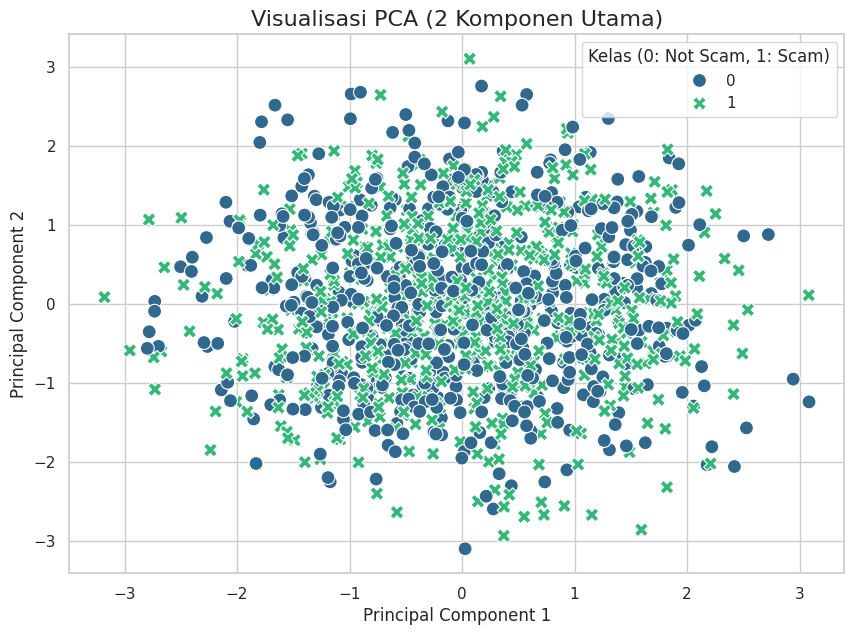

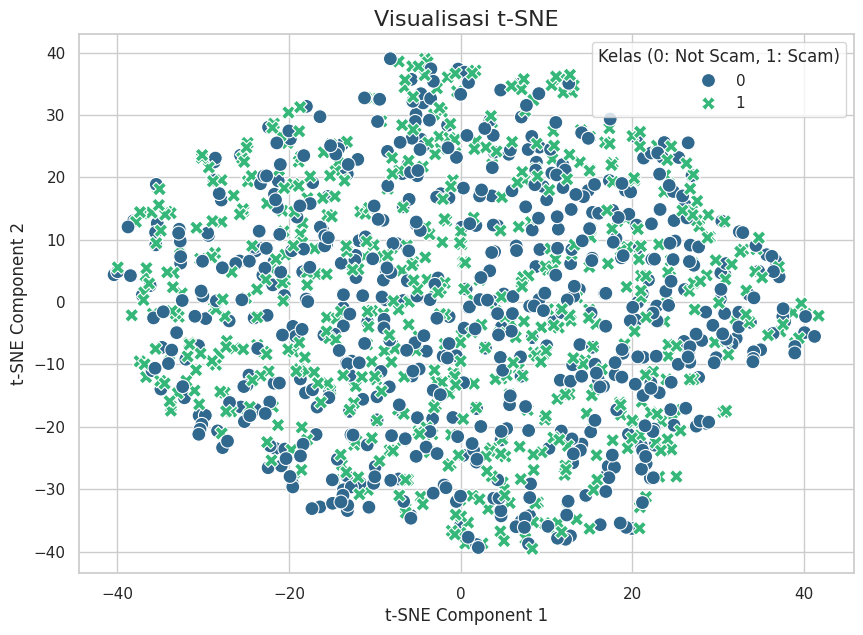

In [ ]:
# =============================================================================
# 4. VISUALISASI EKSPLORATIF (PCA & t-SNE)
# =============================================================================
# [cite_start]PCA (Principal Component Analysis) [cite: 42]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', style=y, s=100)
plt.title('Visualisasi PCA (2 Komponen Utama)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Kelas (0: Not Scam, 1: Scam)')
plt.show()

# t-SNE (t-Distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', style=y, s=100)
plt.title('Visualisasi t-SNE', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Kelas (0: Not Scam, 1: Scam)')
plt.show()

In [ ]:
# =============================================================================
# 5. PEMBAGIAN DATA & INISIALISASI MODEL
# =============================================================================
# [cite_start]Membagi data menjadi data latih dan data uji (70:30) [cite: 37]
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Inisialisasi semua model yang akan digunakan
models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}

In [ ]:
# =============================================================================
# 6. PELATIHAN DAN EVALUASI MODEL
# =============================================================================
for name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Menyimpan hasil
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True),
        'cm': confusion_matrix(y_test, y_pred),
        'y_pred': y_pred,
        'y_proba': y_proba
    }

    print(f"--- Hasil untuk {name} ---")
    print(f"Akurasi: {results[name]['accuracy']:.4f}")
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred))
    print("-" * 30 + "\n")

--- Hasil untuk XGBoost ---
Akurasi: 0.5455
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       187
           1       0.55      0.51      0.53       187

    accuracy                           0.55       374
   macro avg       0.55      0.55      0.54       374
weighted avg       0.55      0.55      0.54       374

------------------------------

--- Hasil untuk Random Forest ---
Akurasi: 0.5134
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       187
           1       0.51      0.47      0.49       187

    accuracy                           0.51       374
   macro avg       0.51      0.51      0.51       374
weighted avg       0.51      0.51      0.51       374

------------------------------

--- Hasil untuk Logistic Regression ---
Akurasi: 0.5134
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0  

In [ ]:
# =============================================================================
# 7. VALIDASI SILANG (CROSS-VALIDATION) & UJI STATISTIK
# =============================================================================
print("\n--- Hasil 10-Fold Cross-Validation ---")
cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name} Akurasi (mean ± std): {scores.mean():.4f} ± {scores.std():.4f}")

# Uji Paired T-test antara XGBoost dan Random Forest
t_stat, p_value = stats.ttest_rel(cv_scores["XGBoost"], cv_scores["Random Forest"])
print("\n--- Uji Paired T-test (XGBoost vs Random Forest) ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value > 0.05:
    print("Kesimpulan: Perbedaan performa tidak signifikan secara statistik (p > 0.05).")
else:
    print("Kesimpulan: Perbedaan performa signifikan secara statistik (p <= 0.05).")


--- Hasil 10-Fold Cross-Validation ---
XGBoost Akurasi (mean ± std): 0.5301 ± 0.0258
Random Forest Akurasi (mean ± std): 0.5245 ± 0.0367
Logistic Regression Akurasi (mean ± std): 0.4897 ± 0.0625
SVM Akurasi (mean ± std): 0.4987 ± 0.0356

--- Uji Paired T-test (XGBoost vs Random Forest) ---
T-statistic: 0.4107
P-value: 0.6909
Kesimpulan: Perbedaan performa tidak signifikan secara statistik (p > 0.05).


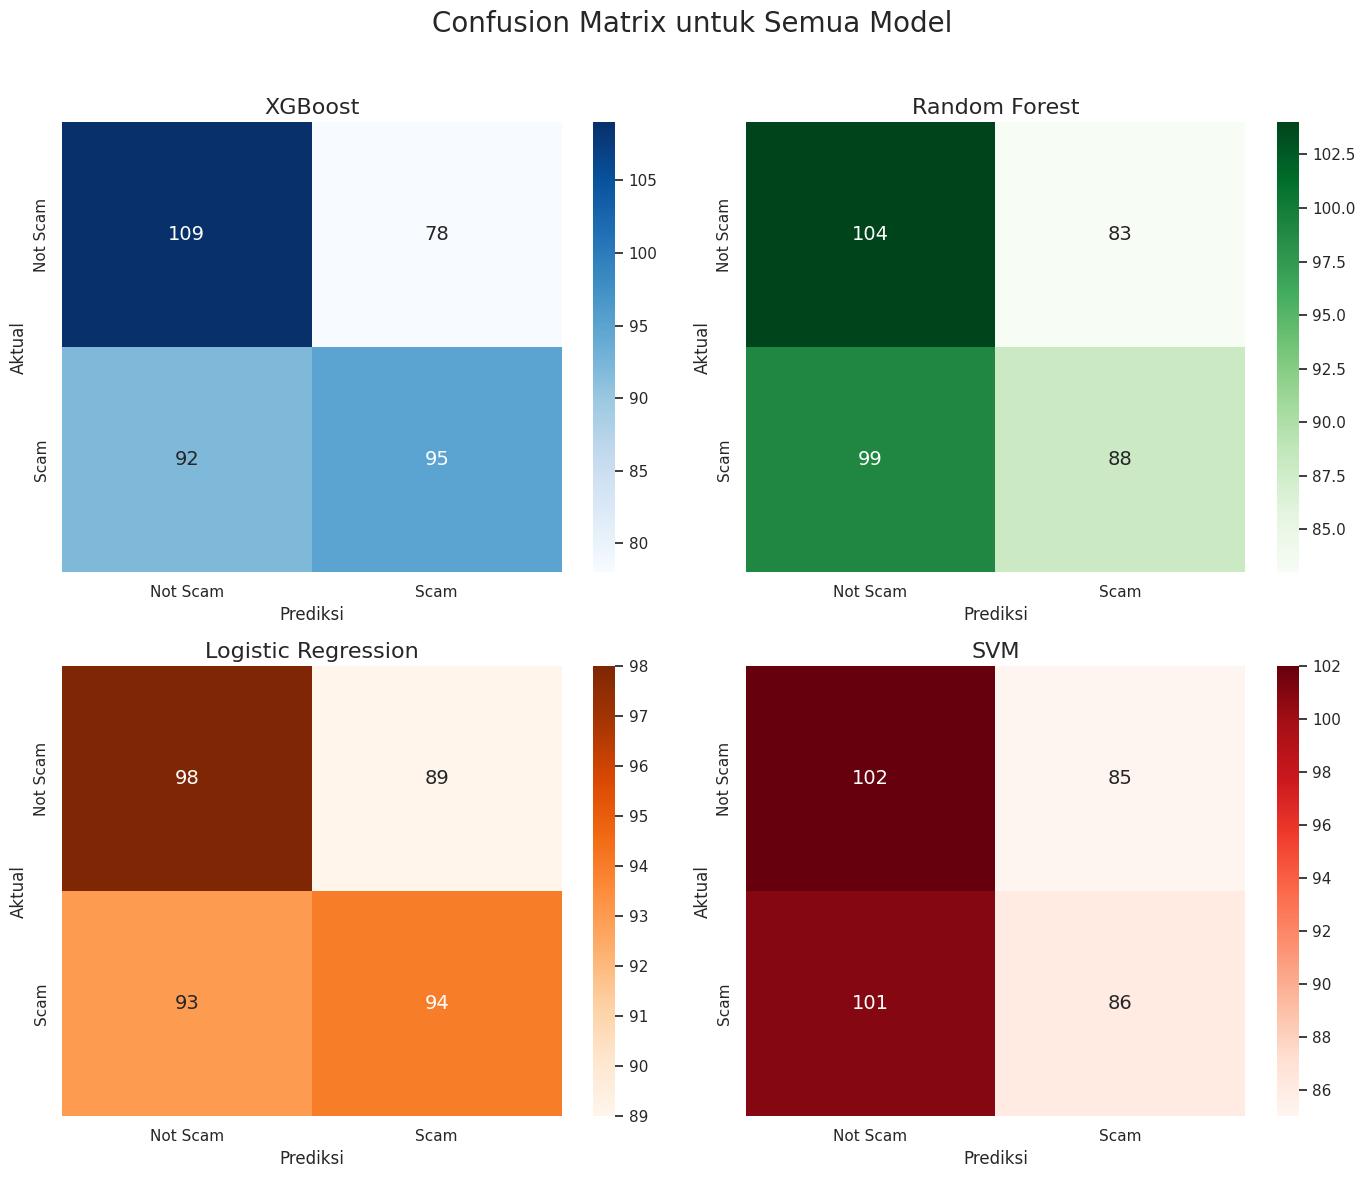

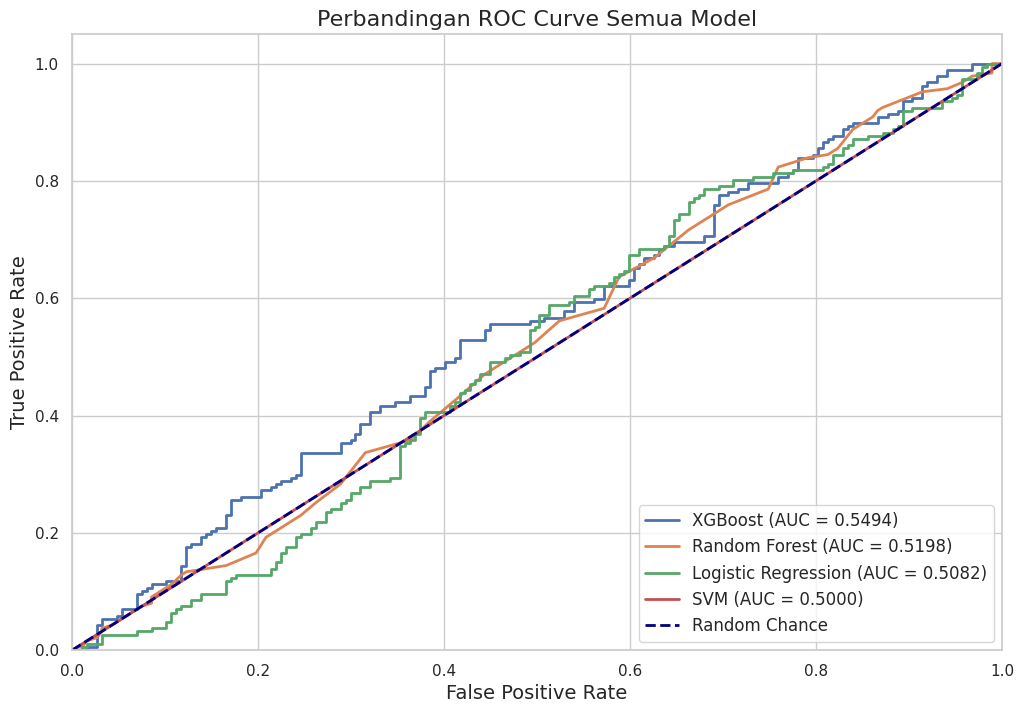

In [ ]:
# =============================================================================
# 8. VISUALISASI HASIL AKHIR
# =============================================================================
# Plotting semua Confusion Matrix
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Confusion Matrix untuk Semua Model', fontsize=20)
axes = axes.flatten()
labels = ['Not Scam', 'Scam']
cmaps = ['Blues', 'Greens', 'Oranges', 'Reds']

for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result['cm'], annot=True, fmt='d', cmap=cmaps[i],
                xticklabels=labels, yticklabels=labels, ax=axes[i],
                annot_kws={"size": 14})
    axes[i].set_title(name, fontsize=16)
    axes[i].set_xlabel('Prediksi', fontsize=12)
    axes[i].set_ylabel('Aktual', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# [cite_start]Plotting perbandingan ROC Curve untuk semua model [cite: 54, 62]
plt.figure(figsize=(12, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Perbandingan ROC Curve Semua Model', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

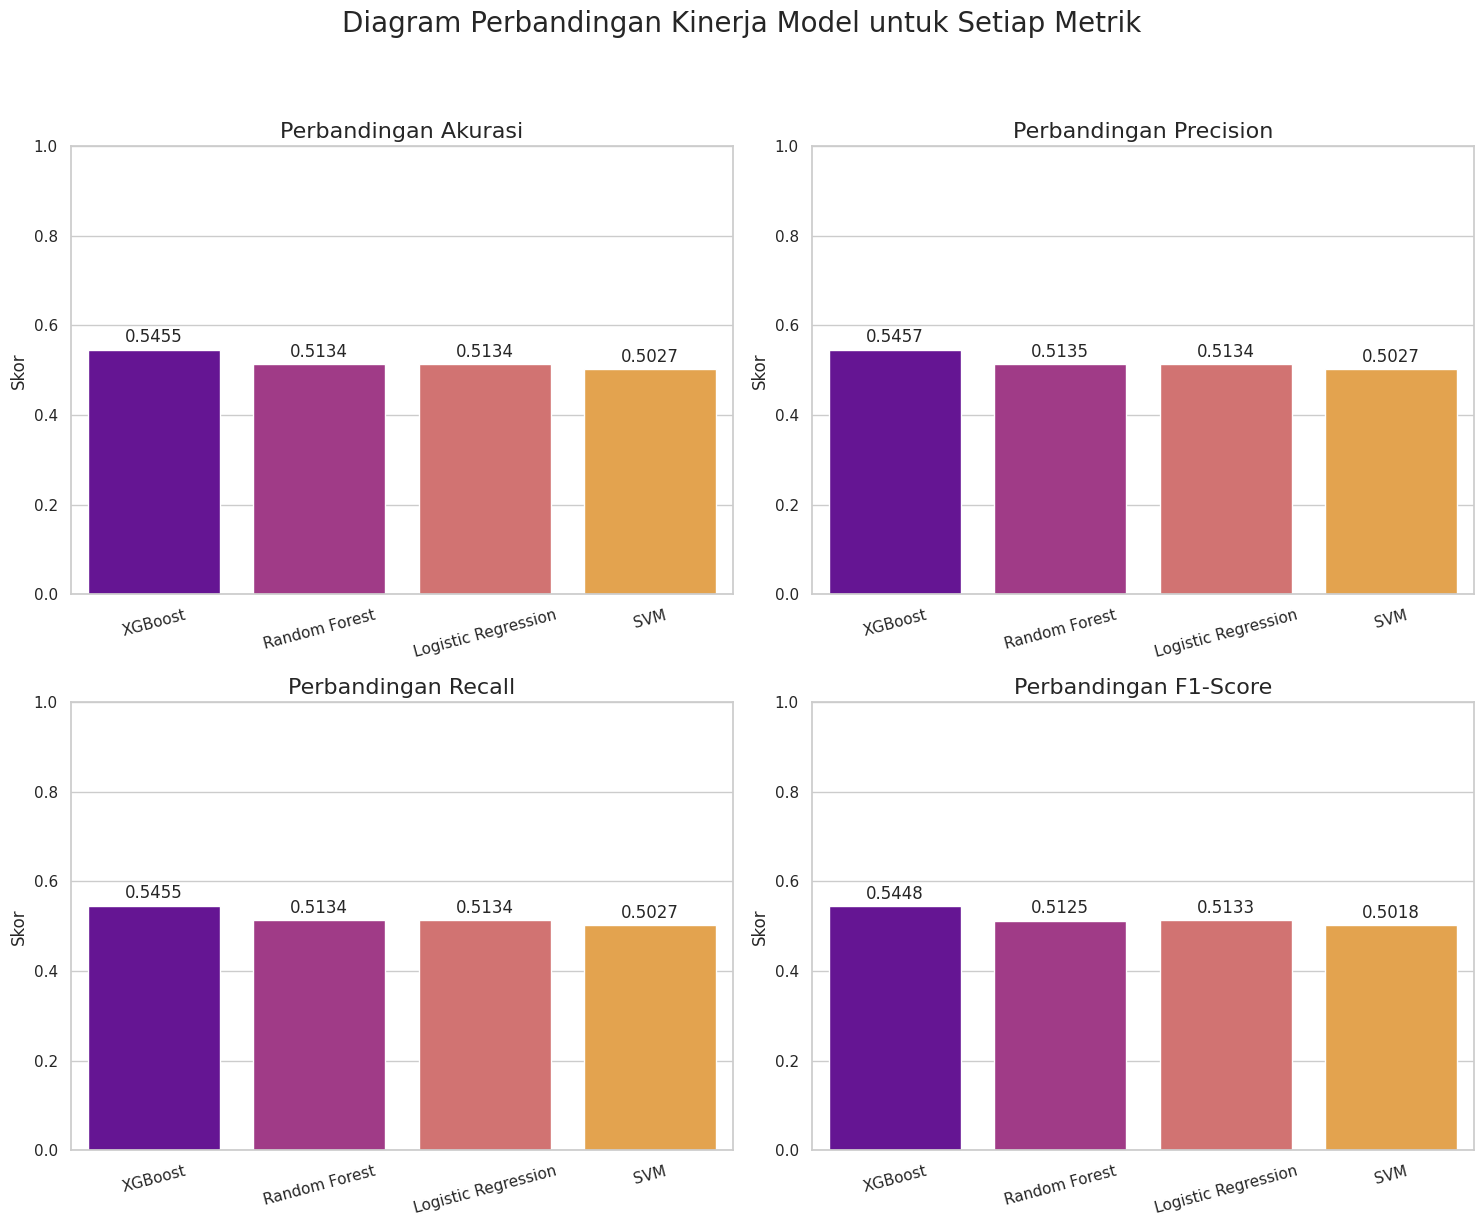

In [ ]:
# =============================================================================
# VISUALISASI 3: DIAGRAM PERBANDINGAN MODEL PER METRIK (SUBPLOT)
# =============================================================================
# Anda harus sudah memiliki dictionary 'results' dari kode sebelumnya

# 1. Ekstrak semua data metrik yang dibutuhkan dari dictionary 'results'
model_names = list(results.keys())
accuracy_scores = [results[name]['accuracy'] for name in model_names]

# Mengambil 'weighted avg' untuk precision, recall, dan f1-score
precision_scores = [results[name]['report']['weighted avg']['precision'] for name in model_names]
recall_scores = [results[name]['report']['weighted avg']['recall'] for name in model_names]
f1_scores = [results[name]['report']['weighted avg']['f1-score'] for name in model_names]

# Siapkan daftar metrik dan datanya
metrics_data = {
    'Akurasi': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}

# 2. Buat subplot 2x2 untuk menampung 4 diagram
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Diagram Perbandingan Kinerja Model untuk Setiap Metrik', fontsize=20, y=1.02)

# Ratakan array axes agar mudah di-loop
axes = axes.flatten()

# Tentukan palet warna
colors = sns.color_palette('plasma', n_colors=len(model_names))

# 3. Loop untuk membuat setiap diagram pada subplotnya masing-masing
for i, (metric_name, scores) in enumerate(metrics_data.items()):
    ax = axes[i]
    sns.barplot(x=model_names, y=scores, ax=ax, palette=colors, hue=model_names, legend=False)

    ax.set_title(f'Perbandingan {metric_name}', fontsize=16)
    ax.set_ylabel('Skor', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylim(0, 1.0)
    ax.tick_params(axis='x', rotation=15)

    # Menambahkan label angka di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

# 4. Tampilkan plot
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Menyesuaikan layout agar supertitle tidak tumpang tindih
plt.show()